# Notebook containing functions for plotting data, functions will save figures to the fig folder in Capstone1
### note: this notebook will be importing user defined functions from the create_dataframes notebook
#### run this install if import from create dataframes notebook not working: pip install ipynb

In [1]:
from ipynb.fs.full.create_dataframes import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
matplotlib.rcParams.update({'font.size': 14})
plt.style.use('ggplot')

In [42]:
def plot_top_artists_bars(spark,colors=['red','blue','orange','purple','gray','green','brown','teal','yellow']):
    """
    Downloads copy of bar graphs detailing top artists features into images folder of repo
    
    ARGS:
        spark - pyspark connection
        colors - list of colors for graphs
    Return:
        none
    """
    path = sys.path[0].replace('/notebooks','')
    df_artist_grouped = create_joined_track_by_artist(spark)
    pd_grouped = df_artist_grouped.toPandas()
    #convert to raw string type for artists with special characters in name
    pd_grouped['artist_name'] = pd_grouped['artist_name'].apply(lambda x: fr'{x}')
    pd_grouped = pd_grouped.convert_dtypes()
    sorted_feature_join = pd_grouped.sort_values('total_tracks_in_playlists',ascending=False)
    top_s = sorted_feature_join.loc[:,['artist_name','acousticness','danceability','energy',"instrumentalness",'liveness','speechiness','valence','loudness','avg_tempo','popularity','total_tracks_in_playlists']].copy()
    
    bars = list(top_s.columns)[1:7]

    fig, ax = plt.subplots(3,3,figsize=(36,24))
    for idx, axs in enumerate(ax.flatten()):
        heights = np.array(top_s.iloc[idx,1:7])
        axs.bar(bars,heights,color=colors[idx],edgecolor="black",alpha=.7)
        axs.set_title(top_s.iloc[idx,0],fontsize=18)
        axs.tick_params(axis='x', which='major', labelsize=13,rotation=20)
    fig.suptitle('Average of Features for Most Frequent Artists',fontsize=24)
    plt.savefig(f'{path}/images/top_artist_bars.png')

def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    """
    creates 1-dim scatterplot with jitter
    
    ARGS:
        data - data to create scatterplot
        ax - matplotlib.pyplot axis
    Return:
        none
    """
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([0, 1])
    ax.tick_params(axis='both', which='major', labelsize=16)

def plot_distributions_feature(spark,colors=['red','blue','orange','purple','gray','green','brown','teal','yellow','pink']):
    """
    Downloads copy of 1-dim scatter plots detailing artists features distribution into images folder of repo
    
    ARGS:
        spark - pyspark connection
        colors - list of colors for graphs
    Return:
        none
    """
    path = sys.path[0].replace('/notebooks','')
    df_artist_grouped = create_joined_track_by_artist(spark)
    pd_grouped = df_artist_grouped.toPandas()
    #convert to raw string type for artists with special characters in name
    pd_grouped['artist_name'] = pd_grouped['artist_name'].apply(lambda x: fr'{x}')
    pd_grouped = pd_grouped.convert_dtypes()
    sorted_feature_join = pd_grouped.sort_values('total_tracks_in_playlists',ascending=False)
    top_s = sorted_feature_join.loc[:,['artist_name','acousticness','danceability','energy',"instrumentalness",'liveness','speechiness','valence','loudness','avg_tempo','popularity','total_tracks_in_playlists']].copy()
    labels = list(top_s.columns)[1:]
    fig, ax = plt.subplots(5,2, figsize=(24, 20))
    for idx, axs in enumerate(ax.flatten()):
        feature = np.array(top_s.iloc[:,idx+1])
        one_dim_scatterplot(feature, axs, color=colors[idx])
        axs.set_title(labels[idx])
    fig.suptitle('Distributions of Features by Artist Across Dataset', fontsize = 24)
    plt.savefig(f'{path}/images/feature_distributions_artists.png')

def violinplot_01(ax, data,figname='Distributions'):
    """
    Downloads copy of violin plot detailing artists features distribution into images folder of repo
    
    ARGS:
        ax - pyplot.subplots object
        data - pandas dataframe object
    Return:
        none
    """
    path = sys.path[0].replace('/notebooks','')
    color = sns.color_palette("coolwarm")
    sns.violinplot(data=data.loc[:,['acousticness','danceability','energy',"instrumentalness",'liveness','speechiness','valence']],orient='h',ax=ax, pallete=color)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_title('Feature Distributions of Artists')
    plt.savefig(f'{path}/images/{figname}.png')
    
def violinplot_02(ax, data,figname='Distributions of Tempo and Popularity'):
    """
    Downloads copy of violin plot detailing 'avg_tempo' and 'popularity' distribution into images folder of repo
    
    ARGS:
        ax - pyplot.subplots object
        data - pandas dataframe object
    Return:
        none
    """
    path = sys.path[0].replace('/notebooks','')
    color = sns.color_palette("coolwarm")
    sns.violinplot(data=data.loc[:,['avg_tempo','popularity']],ax=ax, pallete=color)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_title('Feature Distributions of Artists')
    plt.savefig(f'{path}/images/{figname}.png')
    
def regplot(ax, data, figname='Artist Features Versus Playlist Popularity'):
    """
    Downloads copy of scatter plot with line of best fit detailing Artist Features Versus Playlist Popularity into images folder of repo
    
    ARGS:
        ax - pyplot.subplots object
        data - pandas dataframe object
    Return:
        none
    """
    path = sys.path[0].replace('/notebooks','')
    pd_popular_lists = data[(data['followers'] < 100) & (data['followers'] > 4)]
    for idx, axs in enumerate(ax.flatten()):
        sns.regplot(x=pd_popular_lists["followers"], y=pd_popular_lists.iloc[:,idx+3], line_kws={"color":"b","alpha":0.7,"lw":1}, ax=axs)
    plt.savefig(f'{path}/images/{figname}.png')

# If name = main block

In [3]:
if __name__ == '__main__':
    spark = start_session()
    sc = add_context(spark)

In [4]:
if __name__ == '__main__':
    df_artist_features = create_artist_features_df(spark)
    df_playlists = create_playlists_df(spark)
    df_tracks = create_tracks_df(spark)
    df_joined = create_joined_df(spark)
    df_grouped_join = create_joined_playlist_df(spark)
    df_artist_grouped = create_joined_track_by_artist(spark)
    feat_list = create_features_by_list(spark)
    pop_feat_list = create_features_by_list_popular(spark)

In [36]:
if __name__ == '__main__':
    pd_popular_lists = feat_list.toPandas()
    pd_popular_lists = pd_popular_lists[(pd_popular_lists['followers'] < 100) & (pd_popular_lists['followers'] > 4)]

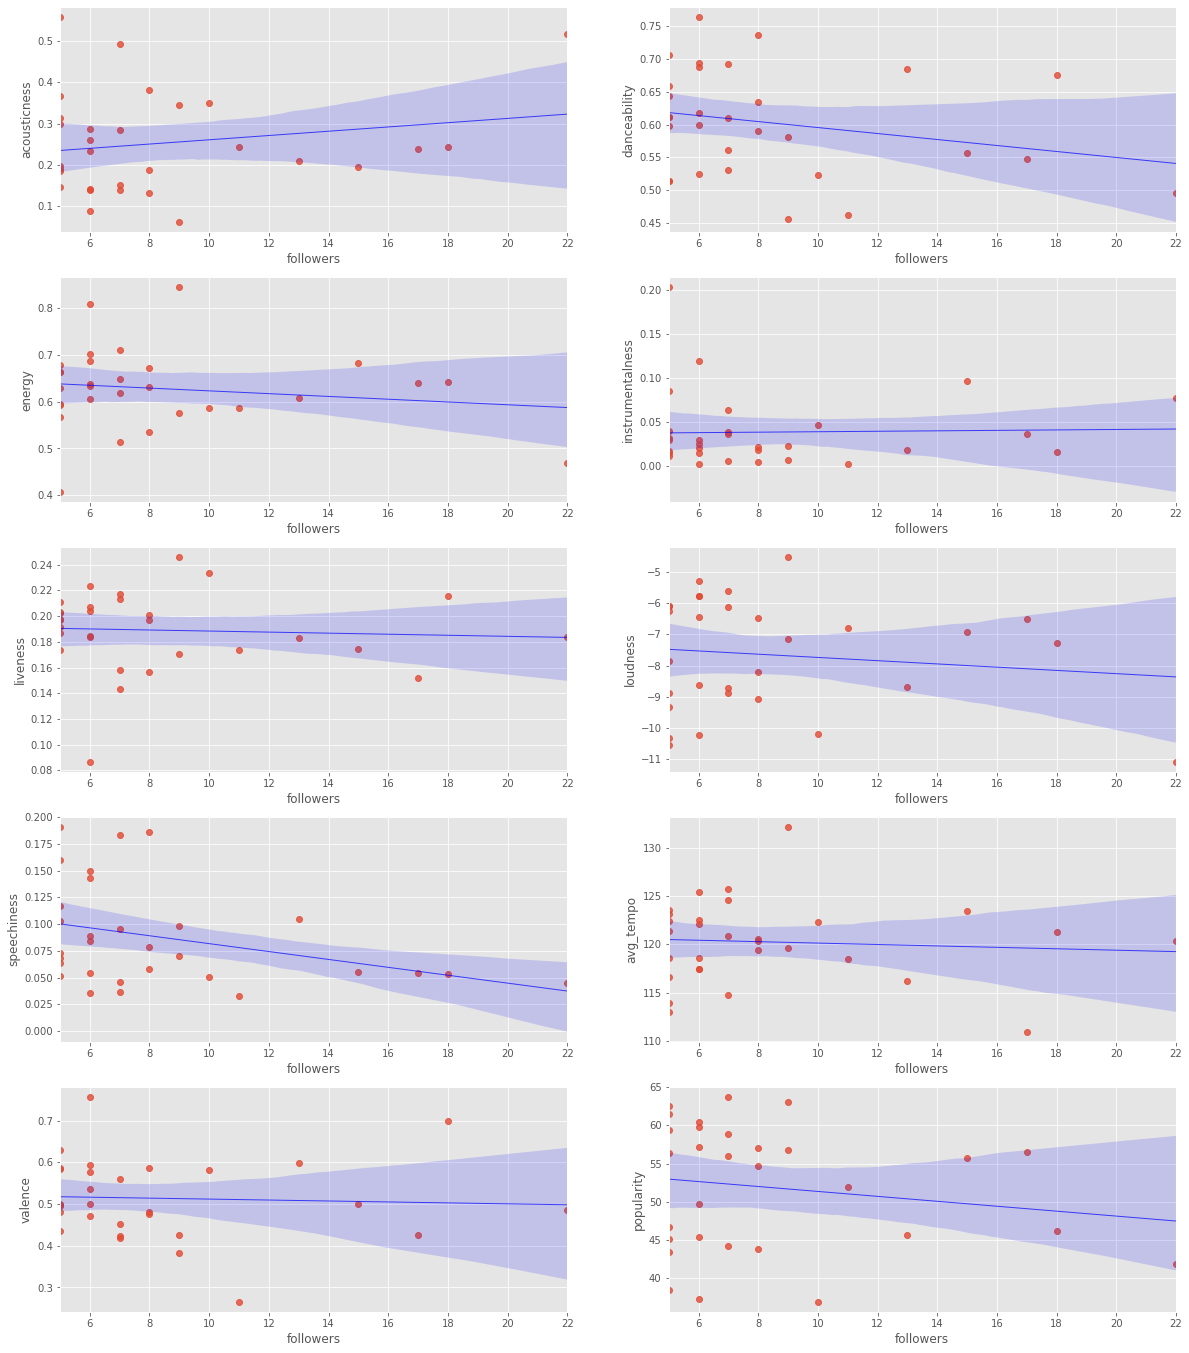

In [43]:
if __name__ == '__main__':
    fig, ax = plt.subplots(5,2,figsize = (20,24))
    regplot(ax, pd_popular_lists)

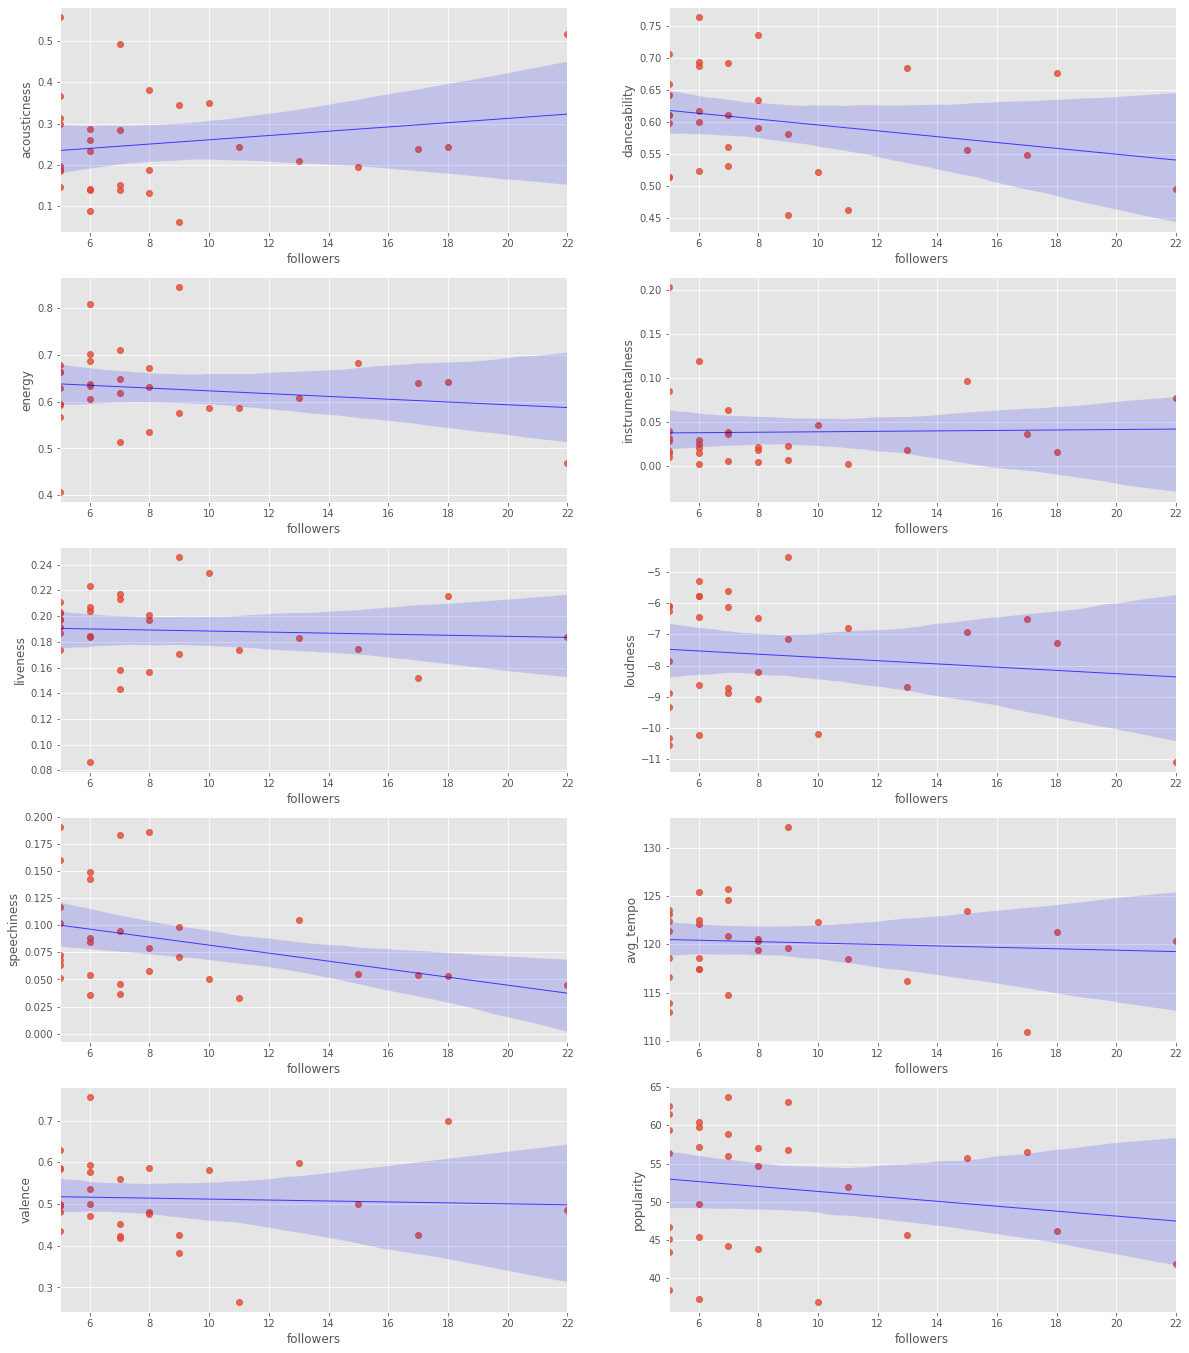

In [34]:
if __name__ == '__main__':
    fig, ax = plt.subplots(5,2,figsize = (20,24))
    for idx, axs in enumerate(ax.flatten()):
        sns.regplot(x=pd_popular_lists["followers"], y=pd_popular_lists.iloc[:,idx+3], line_kws={"color":"b","alpha":0.7,"lw":1}, ax=axs)

In [5]:
if __name__ == '__main__':
    pd_joined = df_grouped_join.toPandas()

In [6]:
if __name__ == '__main__':
    pd_tracks_joined = df_joined.toPandas()
    pd_tracks_joined.groupby('artist_name')

In [7]:
if __name__ == '__main__':
    df_artist_grouped = create_joined_track_by_artist(spark)
    pd_grouped = df_artist_grouped.toPandas()
    #convert to raw string type for artists with special characters in name
    pd_grouped['artist_name'] = pd_grouped['artist_name'].apply(lambda x: fr'{x}')
    pd_grouped = pd_grouped.convert_dtypes()
    sorted_feature_join = pd_grouped.sort_values('total_tracks_in_playlists',ascending=False)
    top_s = sorted_feature_join.loc[:,['artist_name','acousticness','danceability','energy',"instrumentalness",'liveness','speechiness','valence','loudness','avg_tempo','popularity','total_tracks_in_playlists']].copy()

In [8]:
if __name__ == '__main__':
    top_s.head()

,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,avg_tempo,popularity,total_tracks_in_playlists
1220,Drake,0.190538,0.674018,0.577266,0.002736,0.181801,0.21631,0.391614,-7.480949,118.395622,63.452686,939
2236,Kanye West,0.205292,0.600863,0.649066,0.015527,0.268353,0.207987,0.454581,-6.195633,117.889442,61.419846,415
2279,Kendrick Lamar,0.215335,0.641123,0.682574,0.000262,0.270391,0.272675,0.464895,-6.866031,116.31205,62.283951,385
3464,Rihanna,0.154517,0.653338,0.693772,0.00785,0.157614,0.082834,0.514159,-5.481641,120.59919,64.620689,350
1341,Eminem,0.137215,0.734854,0.7453,0.000821,0.233695,0.279618,0.565777,-4.991451,115.158966,58.278873,332


Text(0.5, 1.0, 'Feature Distributions of Artists')

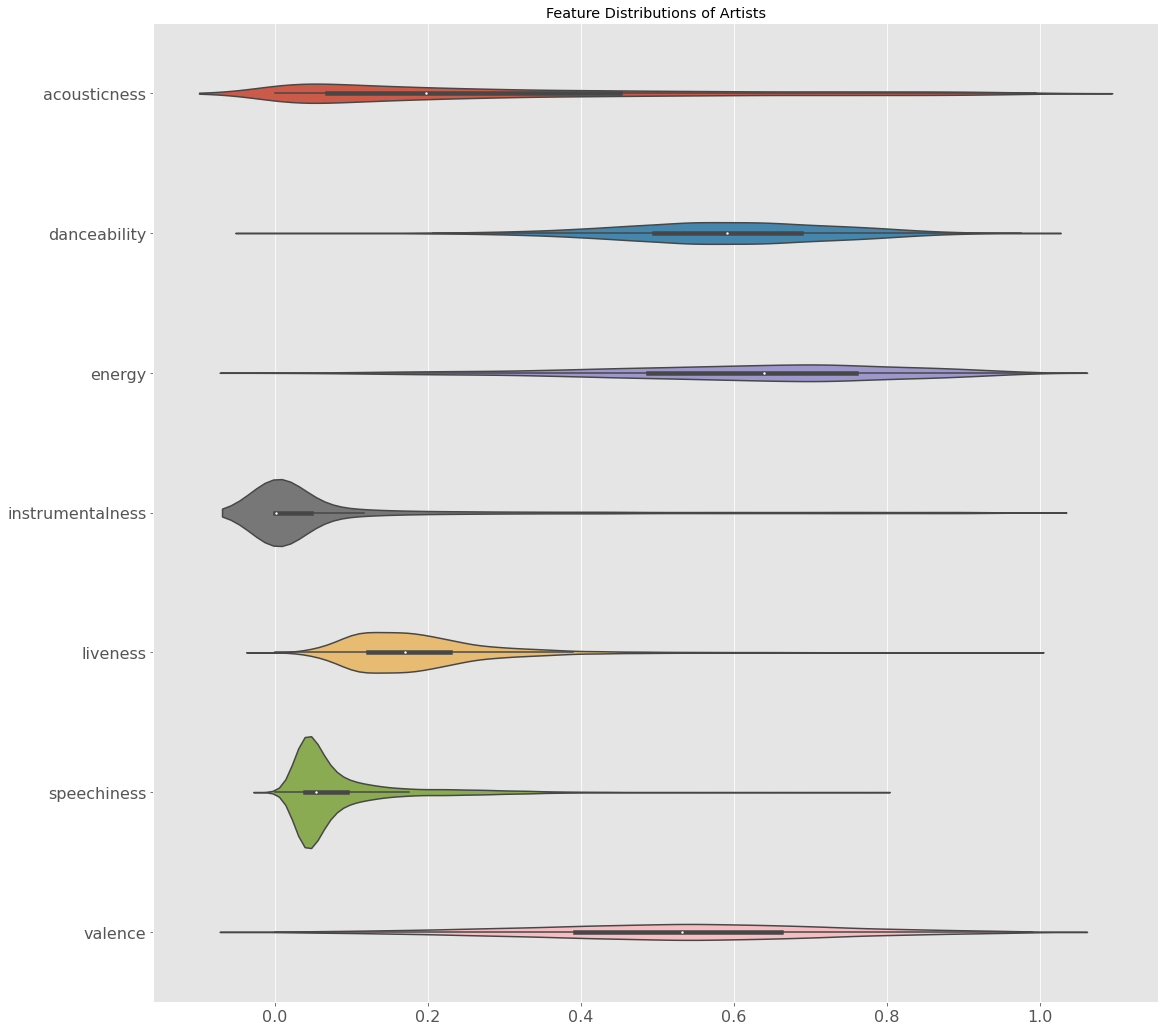

In [9]:
if __name__ == '__main__':
    fig, ax = plt.subplots(1,1,figsize=(18,18))
    color = sns.color_palette("coolwarm")
    sns.violinplot(data=top_s.loc[:,['acousticness','danceability','energy',"instrumentalness",'liveness','speechiness','valence']],orient='h',ax=ax, pallete=color)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_title('Feature Distributions of Artists')

Text(0.5, 0.98, 'Distributions of Features by Artist Across Dataset')

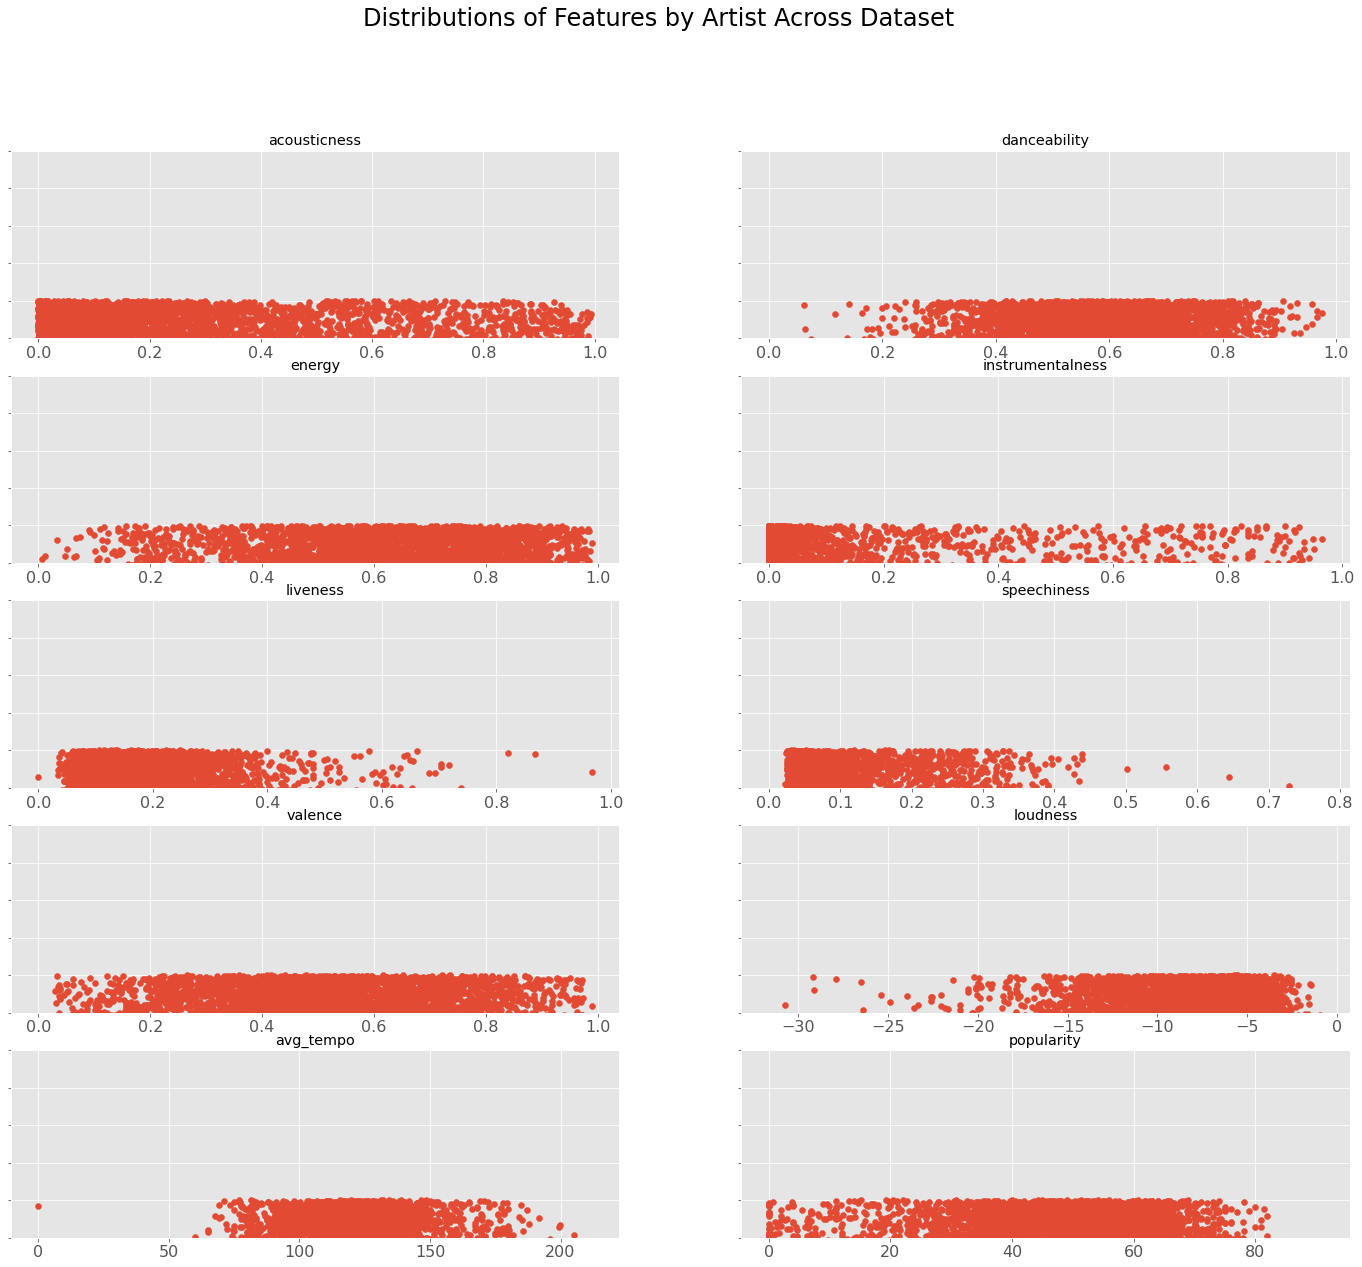

In [10]:
df_artist_grouped = create_joined_track_by_artist(spark)
pd_grouped = df_artist_grouped.toPandas()
#convert to raw string type for artists with special characters in name
pd_grouped['artist_name'] = pd_grouped['artist_name'].apply(lambda x: fr'{x}')
pd_grouped = pd_grouped.convert_dtypes()
sorted_feature_join = pd_grouped.sort_values('total_tracks_in_playlists',ascending=False)
top_s = sorted_feature_join.loc[:,['artist_name','acousticness','danceability','energy',"instrumentalness",'liveness','speechiness','valence','loudness','avg_tempo','popularity','total_tracks_in_playlists']].copy()
labels = list(top_s.columns)[1:]
fig, ax = plt.subplots(5,2, figsize=(24, 20))
for idx, axs in enumerate(ax.flatten()):
    feature = np.array(top_s.iloc[:,idx+1])
    one_dim_scatterplot(feature, axs)
    axs.set_title(labels[idx])
fig.suptitle('Distributions of Features by Artist Across Dataset', fontsize = 24)